In [1]:
import pandas as pd
import numpy as np

def get_stock_df(code: str) -> pd.DataFrame:
    df = pd.read_csv(f'../data/{code}.XSHE_2023-03-28_2024-04-03.csv')
    return df

In [2]:
df = get_stock_df("000001")

In [3]:
df.head()

,date,open,close,high,low,volume,money,factor
0,2023-03-28,11.53,11.52,11.60,11.43,73959636.0,8.517979e+08,0.91113
1,2023-03-29,11.60,11.42,11.61,11.39,65420339.0,7.506876e+08,0.91113
2,2023-03-30,11.43,11.55,11.58,11.31,90497102.0,1.035423e+09,0.91113
3,2023-03-31,11.56,11.42,11.64,11.40,94991018.0,1.092263e+09,0.91113
4,2023-04-03,11.43,11.54,11.56,11.35,81264898.0,9.342852e+08,0.91113


In [ ]:
print(f"Max Price: {df['high'].max()}") # 计算最高价
print(f"Min Price: {df['low'].min()}") # 计算最低价

Max Price: 12.39
Min Price: 8.36


In [11]:
# 计算最高价的最大值和最低值的极差
print(np.ptp(df['high']))
# 计算最低价的最大值和最低值的极差
print(np.ptp(df['low']))

3.870000000000001
3.6000000000000014


In [14]:
# 计算成交量加权平均价格（代表金融资产的平均价格）
print(f"average price: {np.average(df['close'])}")

VWAP = np.average(df['close'], weights=df['volume'])
print(f"weight average price: {VWAP}")

average price: 10.15975806451613
weight average price: 10.103729375070555


In [15]:
# 计算收盘价的中位数
print(np.median(df['close']))

10.39


In [ ]:
# 计算收盘价的方差
print(f"var = {df['close'].var()}")

print(f"var = {np.var(df['close'], ddof=1)}")

# 在计算方差时，Pandas 和 NumPy 的默认行为不同，导致结果差异：
# 分母差异
# Pandas df['close'].var()：默认使用 样本方差（无偏估计），分母为 n - 1。
# NumPy np.var(df['close'])：默认使用 总体方差，分母为 n。


var = 0.9267578359670882
var = 0.9267578359670882


In [25]:
# 计算对数收益率
log_return = np.diff(np.log(df['close']))

print(log_return[:10]) # 打印前五个

# 年波动率等于对数收益率的标准差除以其均值，再乘以交易日的平方根，通常交易日取250天
annual_volatility = log_return.std() / log_return.mean() * np.sqrt(250)

# 月波动率等于对数收益率的标准差除以其均值，再乘以交易月的平方根，通常交易月取12天
monthly_volatility = log_return.std() / log_return.mean() * np.sqrt(12)

print(f"annual_volatility = {annual_volatility}")
print(f"monthly_volatility = {monthly_volatility}")

[-0.00871845  0.01131923 -0.01131923  0.01045306 -0.00086693 -0.00608962
  0.00348432  0.0043384  -0.01044396 -0.00526317]
annual_volatility = -325.55447395050396
monthly_volatility = -71.32541163176761


In [ ]:
# np.convolve的详细计算过程参考此文章：https://www.cnblogs.com/redtank/p/15678714.html
a = np.array([1, 2, 3])
b = np.array([0, 1, 0.5])

# 'full' 模式
result_full = np.convolve(a, b, mode='full')
print("Full mode:", result_full)

# 'same' 模式
result_same = np.convolve(a, b, mode='same')
print("Same mode:", result_same)

# 'valid' 模式
result_valid = np.convolve(a, b, mode='valid')
print("Valid mode:", result_valid)

Full mode: [0.  1.  2.5 4.  1.5]
Same mode: [1.  2.5 4. ]
Valid mode: [2.5]


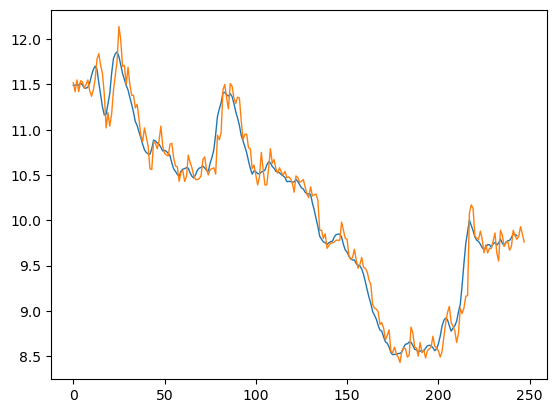

In [47]:
import matplotlib.pyplot as plt

# 5日简单移动平均线计算
N = 5
weights = np.ones(N) / N
sma = np.convolve(df['close'], weights, mode='valid')

# print(sma)
plt.plot(sma, linewidth=1)
plt.plot(df['close'], linewidth=1)
plt.show()
